<a href="https://colab.research.google.com/github/Chandriya/Data-Warehousing/blob/main/Lab1DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
url = "https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol=ADBL&fromDate=2020-04-19&toDate=2025-05-19&pageNo=1&itemsPerPage=10&pagePerDisplay=5&_=1747618698241"
response = requests.get(url)
data = response.json()
stock_data = data.get("result", {}).get("data", [])
df = pd.DataFrame(stock_data)
df.to_csv("adbl_stock_history.csv", index=False)

In [ ]:
import requests
import pandas as pd

def fetchStockData(symbol,start_date,end_date):
  url = f"https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol={symbol}&fromDate={start_date}&toDate={end_date}&pageNo=1&itemsPerPage=1000&pagePerDisplay=5&_=1747618698241"
  response = requests.get(url)
  data = response.json()

  stock_data = data.get("result", {}).get("data", [])
  df = pd.DataFrame(stock_data)
  df.to_csv(f"{symbol}_stock_history.csv", index=False)

In [ ]:
fetchStockData("NABIL", "2021-01-01", "2024-12-31")


In [ ]:
# Cleaning the data

df = pd.read_csv("NABIL_stock_history.csv")
df.head()


,sn,tradeDate,tradeDateString,maxPrice,minPrice,closingPrice,noOfTransactions,volume,amount,previousClosing,differenceRs,percentChange
0,1,2024-12-31T00:00:00,2024-12-31,512.7,498.0,502.0,541,53222,26562216.3,502.7,-0.7,-0.14
1,2,2024-12-29T00:00:00,2024-12-29,508.9,499.0,502.7,617,64296,32322538.0,502.0,0.7,0.14
2,3,2024-12-26T00:00:00,2024-12-26,511.0,498.0,502.0,897,127622,64123331.6,501.0,1.0,0.20
3,4,2024-12-24T00:00:00,2024-12-24,506.0,499.1,501.0,650,66517,33391369.2,501.0,0.0,0.00
4,5,2024-12-23T00:00:00,2024-12-23,502.9,498.0,501.0,796,86473,43272734.6,502.9,-1.9,-0.38


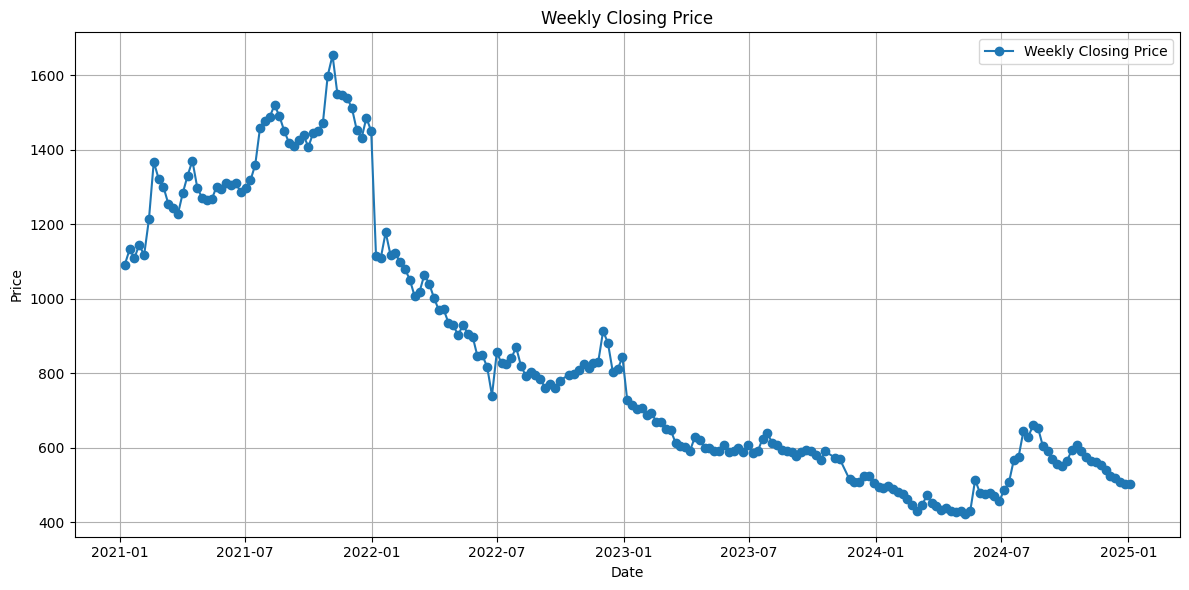

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load CSV with correct date parsing
df = pd.read_csv("NABIL_stock_history.csv", parse_dates=["tradeDate"])

# Step 2: Set tradeDate as index and sort
df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)

# Step 3: Resample to weekly format (ending on Friday)
weekly_df = pd.DataFrame()
weekly_df["closingPrice"] = df["closingPrice"].resample("W-FRI").last()
weekly_df["maxPrice"] = df["maxPrice"].resample("W-FRI").max()
weekly_df["minPrice"] = df["minPrice"].resample("W-FRI").min()
weekly_df["volume"] = df["volume"].resample("W-FRI").sum()
weekly_df["amount"] = df["amount"].resample("W-FRI").sum()
weekly_df["noOfTransactions"] = df["noOfTransactions"].resample("W-FRI").sum()

# Optional: Drop weeks with no data
weekly_df.dropna(inplace=True)

# Step 4: Plot Weekly Closing Price
plt.figure(figsize=(12, 6))
plt.plot(weekly_df.index, weekly_df["closingPrice"], marker='o', label="Weekly Closing Price")
plt.title("Weekly Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-6-2645227217>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df["closingPrice"] = df["closingPrice"].resample("M").last()
<ipython-input-6-2645227217>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df["maxPrice"] = df["maxPrice"].resample("M").max()
<ipython-input-6-2645227217>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df["minPrice"] = df["minPrice"].resample("M").min()
<ipython-input-6-2645227217>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df["volume"] = df["volume"].resample("M").sum()
<ipython-input-6-2645227217>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df["amount"] = df["amount"].resample("M").sum()
<ipython-input-6-2645227217>:

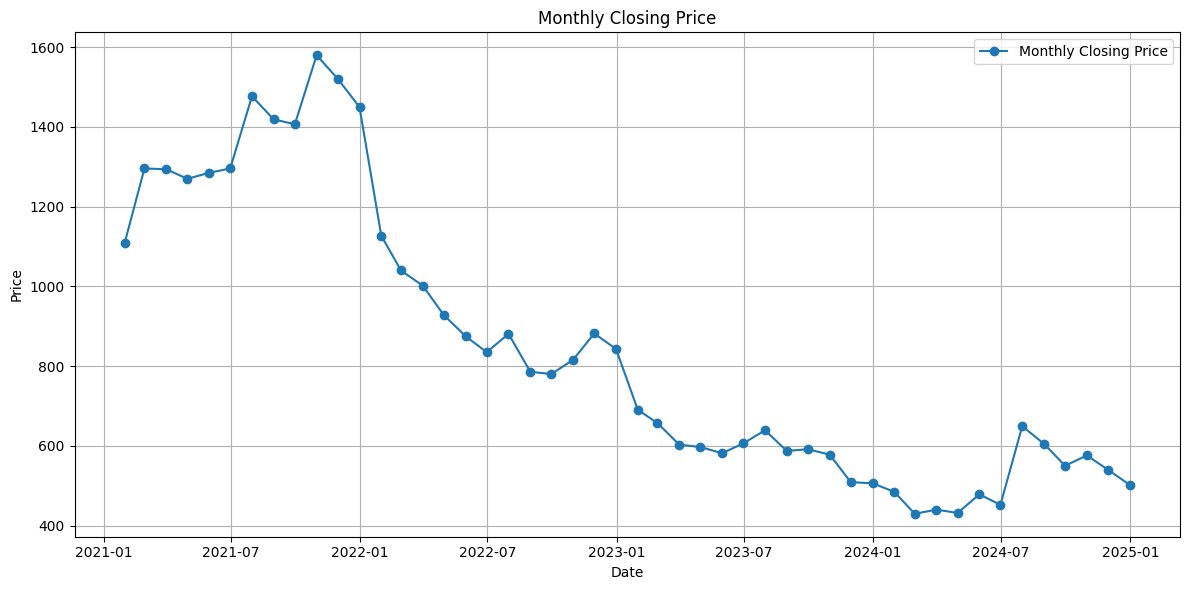

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("NABIL_stock_history.csv", parse_dates=["tradeDate"])

df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)


monthly_df = pd.DataFrame()
monthly_df["closingPrice"] = df["closingPrice"].resample("M").last()
monthly_df["maxPrice"] = df["maxPrice"].resample("M").max()
monthly_df["minPrice"] = df["minPrice"].resample("M").min()
monthly_df["volume"] = df["volume"].resample("M").sum()
monthly_df["amount"] = df["amount"].resample("M").sum()
monthly_df["noOfTransactions"] = df["noOfTransactions"].resample("M").sum()

# Drop months with no data (optional)
monthly_df.dropna(inplace=True)

# Step 4: Plot Monthly Closing Price
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df["closingPrice"], marker='o', label="Monthly Closing Price")
plt.title("Monthly Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

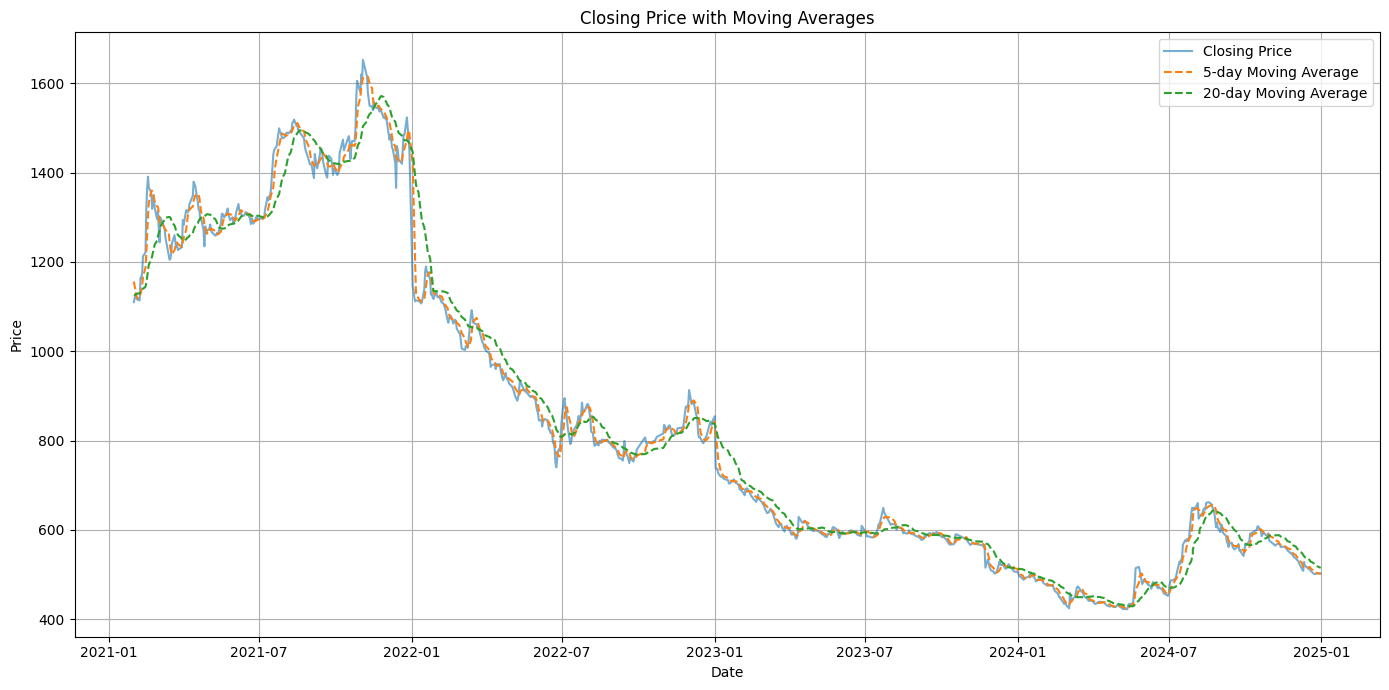

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV (adjust the filename as needed)
df = pd.read_csv("NABIL_stock_history.csv", parse_dates=["tradeDate"])

# Set 'tradeDate' as index and sort chronologically
df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)

# Calculate moving averages on closing price
df["MA_5"] = df["closingPrice"].rolling(window=5).mean()   # 5-day MA
df["MA_20"] = df["closingPrice"].rolling(window=20).mean() # 20-day MA

# Drop NA values to clean the start where MA can't be calculated
df.dropna(subset=["MA_5", "MA_20"], inplace=True)

# Plot
plt.figure(figsize=(14,7))
plt.plot(df.index, df["closingPrice"], label="Closing Price", alpha=0.6)
plt.plot(df.index, df["MA_5"], label="5-day Moving Average", linestyle='--')
plt.plot(df.index, df["MA_20"], label="20-day Moving Average", linestyle='--')

plt.title("Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


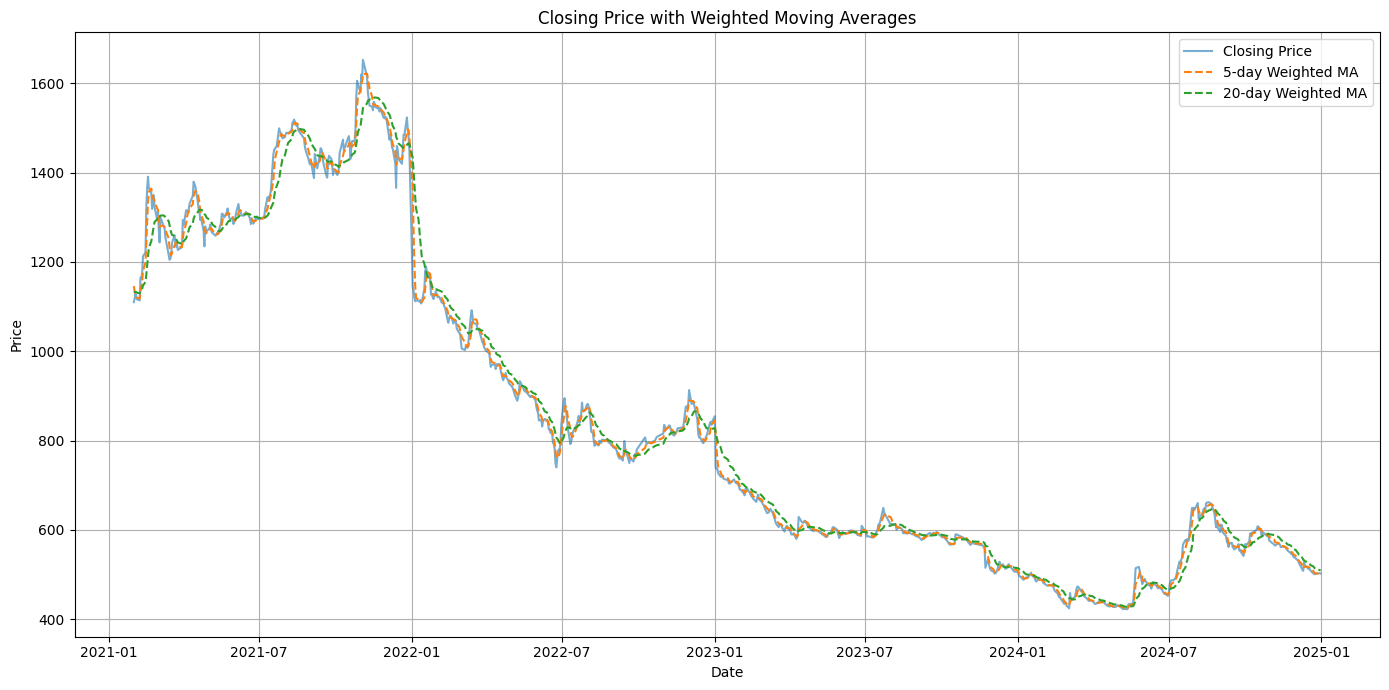

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("NABIL_stock_history.csv", parse_dates=["tradeDate"])
df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)

def weighted_moving_average(values, window):
    weights = np.arange(1, window + 1)  # weights: 1, 2, ..., window
    wma = values.rolling(window).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
    return wma

# Calculate WMA with window size 5 and 20
df["WMA_5"] = weighted_moving_average(df["closingPrice"], 5)
df["WMA_20"] = weighted_moving_average(df["closingPrice"], 20)

# Drop initial NaN rows
df.dropna(subset=["WMA_5", "WMA_20"], inplace=True)

# Plot
plt.figure(figsize=(14,7))
plt.plot(df.index, df["closingPrice"], label="Closing Price", alpha=0.6)
plt.plot(df.index, df["WMA_5"], label="5-day Weighted MA", linestyle="--")
plt.plot(df.index, df["WMA_20"], label="20-day Weighted MA", linestyle="--")

plt.title("Closing Price with Weighted Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


RSI

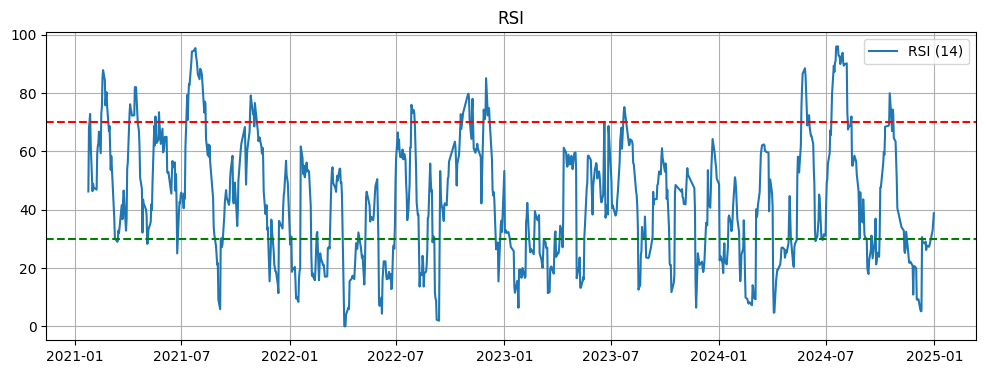

OBV

<ipython-input-15-887219436>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obv.append(obv[-1] + vol[i] if cp[i] > cp[i-1] else obv[-1] - vol[i] if cp[i] < cp[i-1] else obv[-1])


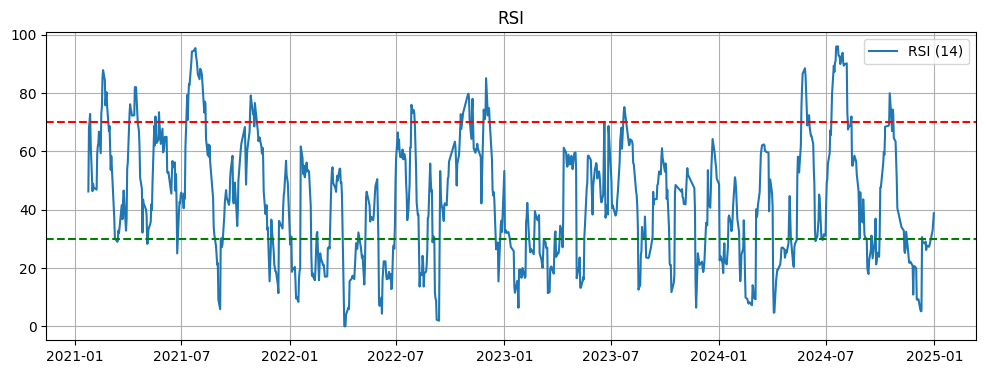

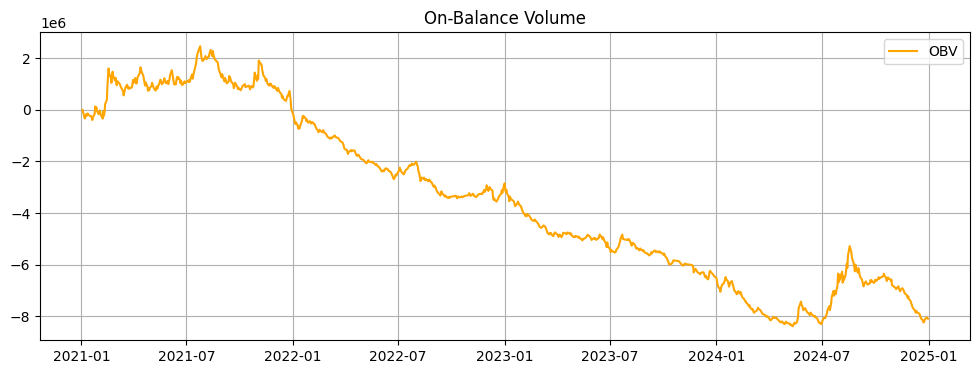

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("NABIL_stock_history.csv", parse_dates=["tradeDate"], index_col="tradeDate").sort_index()
# RSI
delta = df["closingPrice"].diff()
gain = delta.clip(lower=0).rolling(14).mean()
loss = -delta.clip(upper=0).rolling(14).mean()
df["RSI_14"] = 100 - 100 / (1 + gain / loss)


# OBV
obv = [0]
cp, vol = df["closingPrice"], df["volume"]
for i in range(1, len(df)):
    obv.append(obv[-1] + vol[i] if cp[i] > cp[i-1] else obv[-1] - vol[i] if cp[i] < cp[i-1] else obv[-1])
df["OBV"] = obv

# Plot RSI
plt.figure(figsize=(12,4))
plt.plot(df.index, df["RSI_14"], label="RSI (14)")
plt.axhline(70, color='r', ls='--')
plt.axhline(30, color='g', ls='--')
plt.title("RSI"); plt.legend(); plt.grid(); plt.show()

# Plot OBV
plt.figure(figsize=(12,4))
plt.plot(df.index, df["OBV"], label="OBV", color='orange')
plt.title("On-Balance Volume"); plt.legend(); plt.grid(); plt.show()


CCI

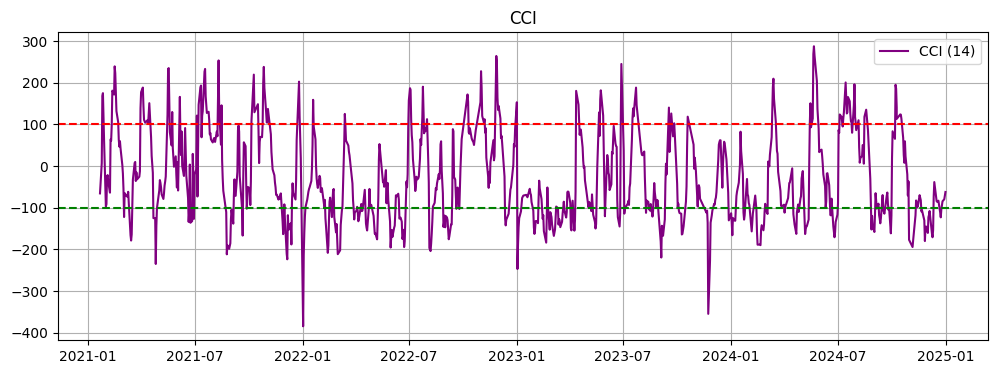

In [ ]:
# CCI (using maxPrice and minPrice instead of high/low)
tp = (df["maxPrice"] + df["minPrice"] + df["closingPrice"]) / 3
df["CCI_14"] = (tp - tp.rolling(14).mean()) / (0.015 * tp.rolling(14).apply(lambda x: abs(x - x.mean()).mean(), raw=True))

# Plot CCI
plt.figure(figsize=(12,4))
plt.plot(df.index, df["CCI_14"], label="CCI (14)", color='purple')
plt.axhline(100, color='r', ls='--'); plt.axhline(-100, color='g', ls='--')
plt.title("CCI"); plt.legend(); plt.grid(); plt.show()

